In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [109]:
df = pd.read_csv('data/raw.csv')

In [110]:
df.head()

,MyUnknownColumn,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,0.0,41.0,F,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,1.0,23.0,F,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,2.0,46.0,M,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,3.0,70.0,F,t,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,4.0,70.0,F,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [111]:
df = df.drop('MyUnknownColumn',axis=1)

In [112]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2492.000000,2492.000000,2136.000000,2492.000000,2383.000000,2384.000000,0.0
mean,52.530899,4.655498,2.015215,109.096469,0.998818,110.766737,NaN
std,20.459187,21.527931,0.820730,35.523972,0.195368,32.937730,NaN
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN
25%,37.000000,0.437500,1.600000,88.000000,0.880000,93.000000,NaN
50%,55.000000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN
75%,68.000000,2.600000,2.400000,125.000000,1.090000,125.000000,NaN
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN


In [113]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'classes'],
      dtype='object')

In [114]:
df.isnull().sum()

age                             0
sex                            93
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                             0
T3_measured                     0
T3                            356
TT4_measured                    0
TT4                             0
T4U_measured                    0
T4U                           109
FTI_measured                    0
FTI                           108
TBG_measured                    0
TBG                          2492
referral_source                 0
classes       

In [115]:
#Percentage of null values in dataset
df.isnull().sum()/df.shape[0]*100

age                            0.000000
sex                            3.731942
on_thyroxine                   0.000000
query_on_thyroxine             0.000000
on_antithyroid_medication      0.000000
sick                           0.000000
pregnant                       0.000000
thyroid_surgery                0.000000
I131_treatment                 0.000000
query_hypothyroid              0.000000
query_hyperthyroid             0.000000
lithium                        0.000000
goitre                         0.000000
tumor                          0.000000
hypopituitary                  0.000000
psych                          0.000000
TSH_measured                   0.000000
TSH                            0.000000
T3_measured                    0.000000
T3                            14.285714
TT4_measured                   0.000000
TT4                            0.000000
T4U_measured                   0.000000
T4U                            4.373997
FTI_measured                   0.000000


In [116]:
#TBG having 100% null values so will drop that column
df=df.drop('TBG',axis=1)

In [117]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,negative


In [118]:
df.drop(['T3_measured','TSH_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','query_hypothyroid', 'query_hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [119]:
df.shape

(2492, 15)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2492 non-null   float64
 1   sex              2399 non-null   object 
 2   sick             2492 non-null   object 
 3   pregnant         2492 non-null   object 
 4   thyroid_surgery  2492 non-null   object 
 5   I131_treatment   2492 non-null   object 
 6   lithium          2492 non-null   object 
 7   goitre           2492 non-null   object 
 8   tumor            2492 non-null   object 
 9   TSH              2492 non-null   float64
 10  T3               2136 non-null   float64
 11  TT4              2492 non-null   float64
 12  T4U              2383 non-null   float64
 13  FTI              2384 non-null   float64
 14  classes          2492 non-null   object 
dtypes: float64(6), object(9)
memory usage: 292.2+ KB


In [121]:
df['thyroid_surgery'].value_counts()

thyroid_surgery
f    2453
t      39
Name: count, dtype: int64

In [127]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    df[i] = pd.to_numeric(df[i])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2492 non-null   float64
 1   sex              2399 non-null   object 
 2   sick             2492 non-null   object 
 3   pregnant         2492 non-null   object 
 4   thyroid_surgery  2492 non-null   object 
 5   I131_treatment   2492 non-null   object 
 6   lithium          2492 non-null   object 
 7   goitre           2492 non-null   object 
 8   tumor            2492 non-null   object 
 9   TSH              2492 non-null   float64
 10  T3               2136 non-null   float64
 11  TT4              2492 non-null   float64
 12  T4U              2383 non-null   float64
 13  FTI              2384 non-null   float64
 14  classes          2492 non-null   object 
dtypes: float64(6), object(9)
memory usage: 292.2+ KB


## Missing Values

In [124]:
df.isnull().sum()

age                  0
sex                 93
sick                 0
pregnant             0
thyroid_surgery      0
I131_treatment       0
lithium              0
goitre               0
tumor                0
TSH                  0
T3                 356
TT4                  0
T4U                109
FTI                108
classes              0
dtype: int64

In [129]:
df = df.dropna(subset=['TT4', 'FTI', 'age', 'sex'])
df['TT4'] = df['TT4'].astype(int)
df['FTI'] = df['FTI'].astype(int)
df['age'] = df['age'].astype(int)
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['pregnant'] = df['pregnant'].map({'f': 0, 't': 1})
df['thyroid_surgery '] = df['thyroid_surgery'].astype(int)


In [130]:
miss_cols = ['sex','T3','T4U','FTI']
for i in miss_cols:
    df[i] = df[i].fillna(df[i].mean())

In [131]:
df.isnull().sum()

age                 0
sex                 0
sick                0
pregnant            0
thyroid_surgery     0
I131_treatment      0
lithium             0
goitre              0
tumor               0
TSH                 0
T3                  0
TT4                 0
T4U                 0
FTI                 0
classes             0
thyroid_surgery     0
dtype: int64

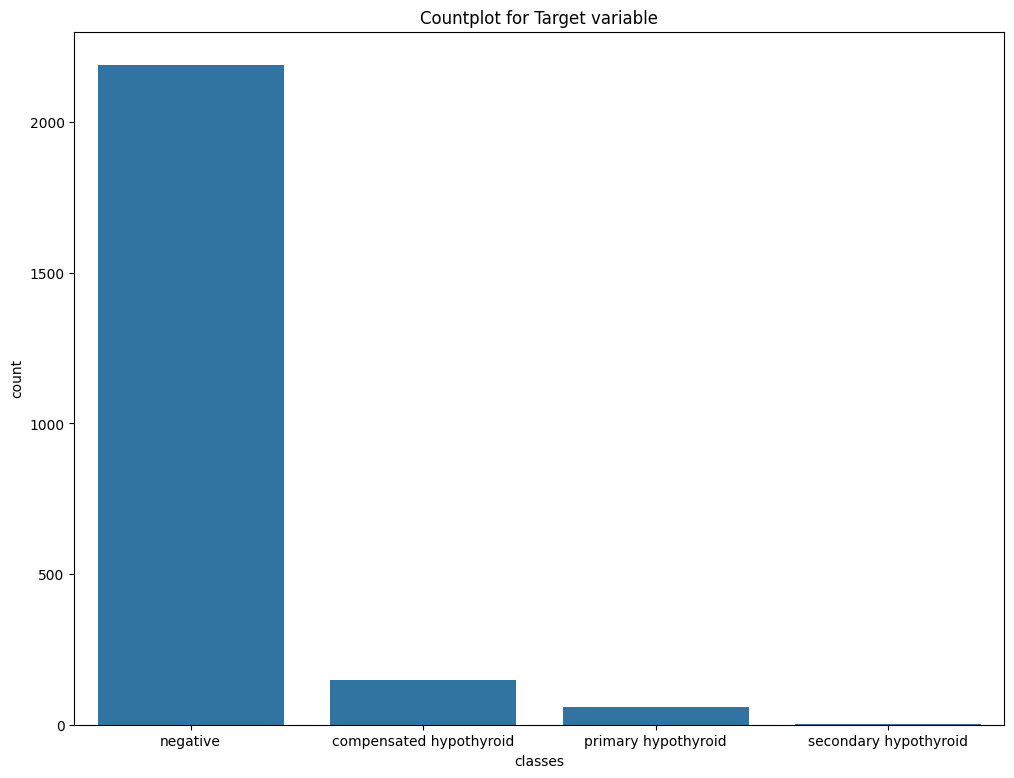

In [91]:
plt.figure(figsize=(12,9))
sns.countplot(x='classes',data=df)
plt.title("Countplot for Target variable");

<Axes: xlabel='age', ylabel='classes'>

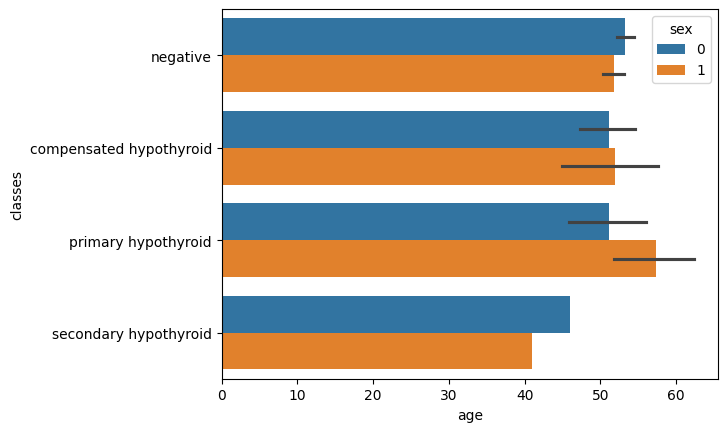

In [95]:
##Visualisation Age vs Purchased
sns.barplot(x='age', y='classes', hue='sex', data=df)

<Axes: >

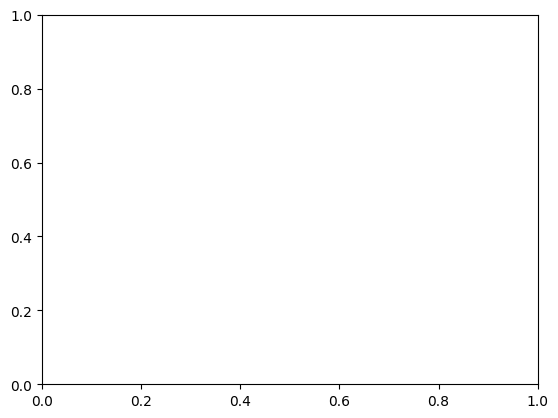

In [132]:
sns.barplot(x='pregnant', y='thyroid_surgery',hue="classes", data=df)

<Axes: >

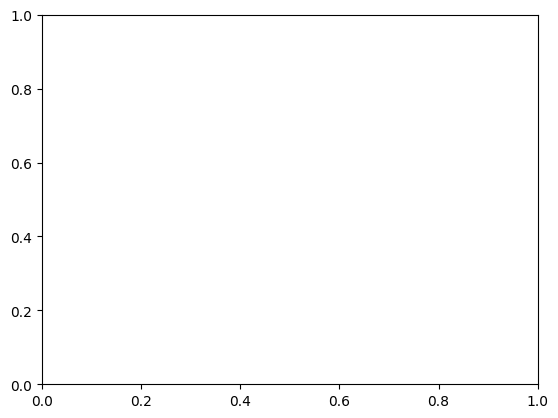

In [133]:
sns.barplot(x='age', y='classes',hue="sex", data=df)

In [136]:
print(df['thyroid_surgery'].unique())


[]
